In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
#PRECLASS
from scipy.optimize import minimize
import numpy as np
#mu_0, nu_0, alpha_0, beta_0
def f(x):
    return (x[0] - 2.3)**2 + ((x[3]/(x[2]-1)) - 0.25)**2 + ((x[3]/((x[2]-1)*x[1])) - 2.75)**2 + ((x[3]**2)/(((x[2]-1)**2)*(x[2]-2))-1)**2

initial = np.array([1,2,3,2])
result = minimize(f, initial)
hyperparamters = result.x
print(hyperparamters)

[2.30000026 0.09090737 2.06249763 0.2656195 ]


In [ ]:
def norminvgamma_pdf(x, sigma2, mu, nu, alpha, beta):
    '''
    The probability density function of the normal-inverse-gamma distribution at
    x (mean) and sigma2 (variance).
    '''
    return (
        sts.norm.pdf(x, loc=mu, scale=np.sqrt(sigma2 / nu)) *
        sts.invgamma.pdf(sigma2, a=alpha, scale=beta))

def norminvgamma_rvs(mu, nu, alpha, beta, size=1):
    '''
    Generate n samples from the normal-inverse-gamma distribution. This function
    returns a (size x 2) matrix where each row contains a sample, (x, sigma2).
    '''
    # Sample sigma^2 from the inverse-gamma distribution
    sigma2 = sts.invgamma.rvs(a=alpha, scale=beta, size=size)
    # Sample x from the normal distribution
    x = sts.norm.rvs(loc=mu, scale=np.sqrt(sigma2 / nu), size=size)
    return np.vstack((x, sigma2)).transpose()

In [ ]:
# This data set comprises the number of successes and failures in a medical trial.
data = {'improved': 107, 'not improved': 34}

# The binomial distribution is an appropriate likelihood function for this type
# of data. The support of the binomial distribution is the non-negative integers,
# representing the number of successes out of n trials.

# The unobserved parameter p of the binomial likelihood is the probability of
# single patient getting better when getting the treatment.

# We use the conjugate beta prior distribution over the parameter p. The prior
# hyperparameters are chosen to be α=1 and β=1 since that gives us a uniform
# (very uncertain) distribution over p, which is appropriate since we are given
# no information about what p might be.
alpha_prior = 1
beta_prior = 1
prior = stats.beta(a=alpha_prior, b=beta_prior)

# Plot the prior
plot_x = np.linspace(0, 1, 200)
plot_y = prior.pdf(plot_x)
plt.plot(plot_x, plot_y)
plt.title('Beta prior over p')
plt.xlabel('p')
plt.ylabel('probability density')
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.show()



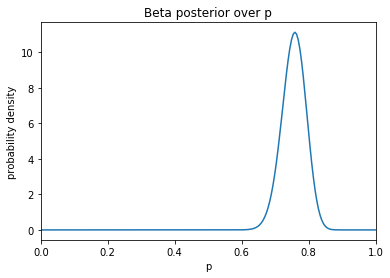

Expected probability of treatment success: 0.755
95% confidence interval over probability of treatment success: [0.682, 0.822]


In [5]:
# Compute posterior hyperparameters
alpha_post = alpha_prior + data['improved']
beta_post = beta_prior + data['not improved']
posterior = stats.beta(a=alpha_post, b=beta_post)

# Plot the posterior
plot_x = np.linspace(0, 1, 200)
plot_y = posterior.pdf(plot_x)
plt.plot(plot_x, plot_y)
plt.title('Beta posterior over p')
plt.xlabel('p')
plt.ylabel('probability density')
plt.xlim(0, 1)
plt.show()

# Describe posterior
print(
    'Expected probability of treatment success: %.3f' %
    (posterior.mean()))
print(
    '95%% confidence interval over probability of treatment success: [%.3f, %.3f]' %
    posterior.interval(0.95))

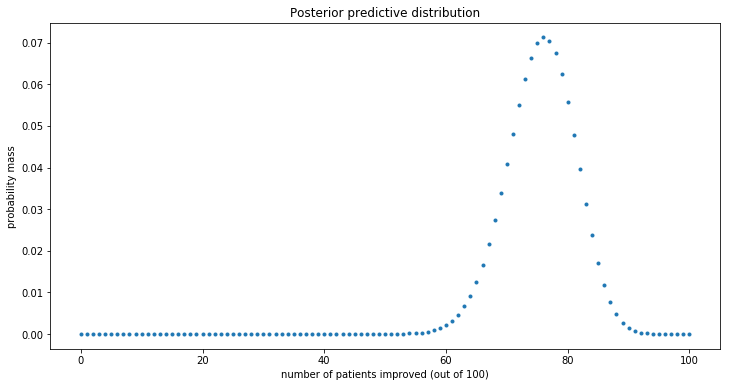

In [6]:
# Beta-binomial pmf with 100 patients and alpha_post and beta_post parameters
def beta_binomial_pmf(k, n, alpha, beta):
    from scipy.special import betaln, comb
    log_pmf = np.log(comb(n, k)) + betaln(k + alpha, n - k + beta) - betaln(alpha, beta)
    return np.exp(log_pmf)

x = np.arange(0, 101)
y = beta_binomial_pmf(x, 100, alpha_post, beta_post)
plt.figure(figsize=(12, 6))
plt.plot(x, y, '.')
plt.title('Posterior predictive distribution')
plt.xlabel('number of patients improved (out of 100)')
plt.ylabel('probability mass')
plt.show()

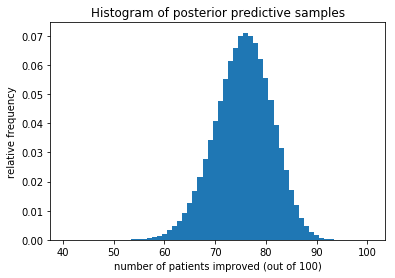

In [7]:
# Using sampling from posterior + likelihood for posterior predictive
samples = 1000000
counts = stats.binom.rvs(100, posterior.rvs(size=samples), size=samples)
plt.hist(counts, bins=np.arange(40, 101) + 0.5, density=True)
plt.title('Histogram of posterior predictive samples')
plt.xlabel('number of patients improved (out of 100)')
plt.ylabel('relative frequency')
plt.show()

In [8]:
print('Probability that at least 2/3 of patients get better: %.3f' %
      (1 - posterior.cdf(2/3)))
print('Probability that at least 75%% of patients get better: %.3f' %
      (1 - posterior.cdf(0.75)))

Probability that at least 2/3 of patients get better: 0.990
Probability that at least 75% of patients get better: 0.571
